In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('train.csv')
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
print(data.shape)

(42000, 785)


In [3]:
l=data['label']
print(l.head(10))
l.shape

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64


(42000,)

In [4]:
d=data.drop("label",axis=1)
print(d.head(5))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


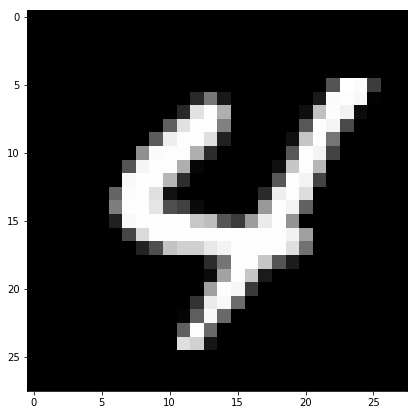

4


In [5]:
plt.figure(figsize=(7,7))
indx=1768
grid_data=d.iloc[indx].as_matrix().reshape(28,28)
plt.imshow(grid_data,cmap='gray')
plt.show()
print(l[indx])

In [6]:

d['pixel0'].std(axis=0)

0.0

In [7]:
label=l.head(15000)
data=d.head(15000)
print(label.shape)
print(data.shape)

(15000,)
(15000, 784)


In [8]:
from sklearn.preprocessing import StandardScaler
stan_data=StandardScaler().fit_transform(data)
print(stan_data.shape)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
covar_matrix=np.matmul(stan_data.T,stan_data)
print(covar_matrix.shape)

(784, 784)


In [10]:
from scipy.linalg import eigh
values, vector =eigh(covar_matrix, eigvals=(782,783))
print(values.shape)
print(vector.shape)


(2,)
(784, 2)


In [11]:
s_d=stan_data

new_cord=np.matmul(s_d,vector)
new_cord=new_cord.T
new_cord.shape


(2, 15000)

In [12]:


new_cord=np.vstack((new_cord,label))
#print(new_cord.shape)
new_cord=new_cord.T
dataframe=pd.DataFrame(data=new_cord,columns=("1st Principle","2nd Principle","labels"))
print(dataframe.head())
print(stan_data.shape)

   1st Principle  2nd Principle  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0
(15000, 784)


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'FacetGrid' object has no attribute 'add_lengend'

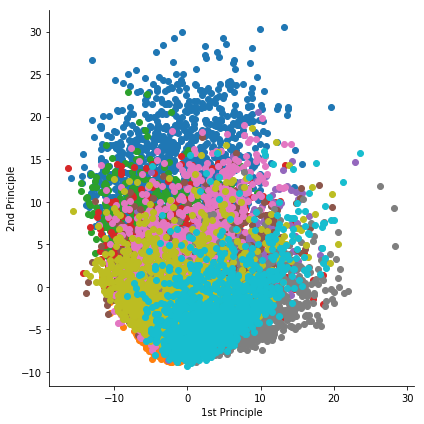

In [13]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='labels',size=6).map(plt.scatter,'1st Principle','2nd Principle').add_legend()
plt.show


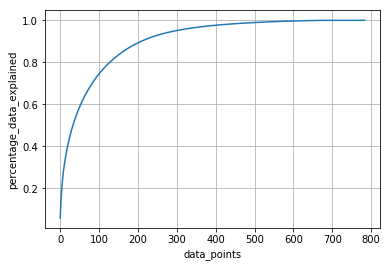

In [14]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=784
pca_data =pca.fit_transform(stan_data)
p_var_expld=pca.explained_variance_/np.sum(pca.explained_variance_)
c_var_expld=np.cumsum(p_var_expld)
plt.plot(c_var_expld)
plt.xlabel("data_points")
plt.ylabel("percentage_data_explained")
plt.grid()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


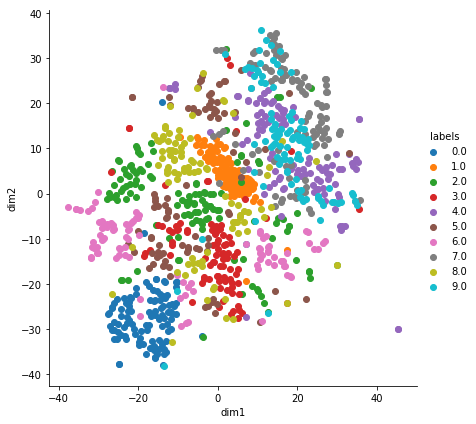

In [27]:
from sklearn.manifold import TSNE
data_1000=stan_data[0:1000,:]
labels_1000=label[0:1000]
model = TSNE(n_components=2,random_state=0,perplexity=60,n_iter=5000)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("dim1","dim2","labels"))
sns.FacetGrid(tsne_df,hue="labels",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


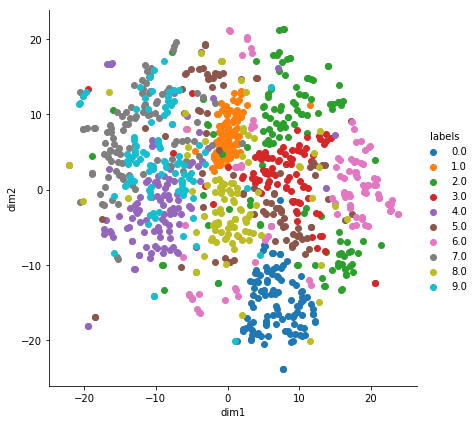

In [28]:
model_1 = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=7000)
tsne_data_1=model_1.fit_transform(data_1000)
tsne_data_1=np.vstack((tsne_data_1.T,labels_1000)).T
tsne_df_1=pd.DataFrame(data=tsne_data_1,columns=("dim1","dim2","labels"))
sns.FacetGrid(tsne_df_1,hue="labels",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


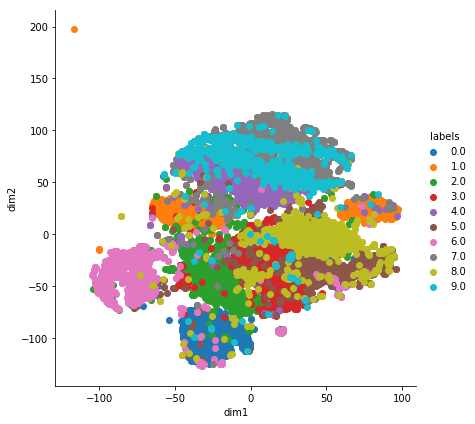

In [29]:
data_1000=stan_data[0:14000,:]
labels_1000=label[0:14000]
model = TSNE(n_components=2,random_state=0,perplexity=60,n_iter=5000)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("dim1","dim2","labels"))
sns.FacetGrid(tsne_df,hue="labels",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()